In [1]:
# See A&S ELOG 1581: https://qweak.jlab.org/elog/Analysis+%26+Simulation/1581
# Also see Katherine's Tracking ELOG 48 https://qweak.jlab.org/elog/Tracking/48

In [2]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [16]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    "font.sans-serif": "Computer Modern Sans serif",
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [4]:
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

In [5]:
%matplotlib inline
pp.style.use('seaborn-ticks')
sns.set_palette("muted")

In [6]:
# Average of MD rates without MD 2
data = pd.read_csv('data/al_4p_ds_run1_hybrid_qtorscan_rates.csv')
# MD rates
md_data = pd.read_csv('data/al_4p_ds_run1_hybrid_qtorscan_rates_md.csv')
# MD scalar rates (old)
#scalar_header=['md1', 'md1_err', 'md2', 'md2_err', 'md3', 'md3_err', 'md4', 'md4_err', 'md5', 'md5_err', 'md6', 'md6_err', 'md7', 'md7_err', 'md8', 'md8_err']
scalar_data = pd.read_csv('data/al_4p_ds_run1_scalar_qtorscan_rates_md.csv', )
#scalar_data.to_csv('data/al_4p_ds_run1_scalar_qtorscan_rates_md.csv')

In [7]:
data.head()

,qtor,rate,ss_err,model_err,bcm_err,total_err
0,8653,1.4512,0.0025,0.0109,0.0218,0.0246
1,8700,1.5725,0.0029,0.0118,0.0236,0.0268
2,8743,1.6588,0.0033,0.0124,0.0249,0.0283
3,8832,1.7581,0.0037,0.0132,0.0264,0.0302
4,8899,1.7692,0.0037,0.0133,0.0265,0.0304


In [8]:
md_data.head()

,qtor,one,two,three,four,five,six,seven,eight,one_err,two_err,three_err,four_err,five_err,six_err,seven_err,eight_err
0,8653,1.496153,1.460984,1.382779,1.354449,1.471395,1.416258,1.535829,1.501414,0.002583,0.002445,0.002470,0.002321,0.002546,0.002323,0.002731,0.002605
1,8700,1.626087,1.542752,1.472000,1.468352,1.602023,1.556683,1.664012,1.618055,0.003049,0.002732,0.002787,0.002734,0.003013,0.002802,0.003203,0.003025
2,8743,1.720887,1.597566,1.535449,1.554072,1.694164,1.657426,1.750499,1.699225,0.003420,0.002922,0.003032,0.003040,0.003356,0.003162,0.003534,0.003327
3,8832,1.831864,1.640932,1.600799,1.654792,1.804985,1.781865,1.846394,1.786346,0.003845,0.003077,0.003257,0.003426,0.003811,0.003655,0.003936,0.003667
4,8899,1.847324,1.631558,1.605230,1.671588,1.817320,1.801075,1.853194,1.788973,0.003922,0.003042,0.003292,0.003492,0.003860,0.003715,0.003962,0.003691


In [9]:
scalar_data.head()

,qtor,md1,md1_err,md2,md2_err,md3,md3_err,md4,md4_err,md5,md5_err,md6,md6_err,md7,md7_err,md8,md8_err
0,8653,1.499794,0.008088,1.486819,0.011049,1.386148,0.027294,1.361868,0.021411,1.477712,0.011454,1.427341,0.008664,1.543257,0.010416,1.509221,0.008900
1,8700,1.630124,0.009254,1.570733,0.012275,1.474839,0.027971,1.477749,0.022157,1.609514,0.012747,1.571045,0.010189,1.671630,0.011817,1.626622,0.010032
2,8743,1.727153,0.010218,1.628345,0.013157,1.540965,0.028541,1.563430,0.023004,1.703341,0.013786,1.673046,0.011367,1.759916,0.012848,1.709468,0.010909
3,8832,1.836387,0.011386,1.673605,0.013885,1.605553,0.029302,1.665867,0.023729,1.813522,0.015162,1.799456,0.012965,1.857162,0.014109,1.797276,0.011910
4,8899,1.851188,0.011569,1.662969,0.013710,1.610789,0.029520,1.682836,0.023728,1.826579,0.015370,1.818483,0.013230,1.863473,0.014226,1.802017,0.011988


In [10]:
#Calculate old scalar main detector average
scalar_data['avg'] = (scalar_data.md1 + scalar_data.md2 + scalar_data.md3 + scalar_data.md4 + scalar_data.md5 + scalar_data.md6 + scalar_data.md7 + scalar_data.md8)/8.0

In [11]:
# Read in simulation averages
qtor = [8653, 8700, 8743, 8832, 8899, 8921, 8943, 8967, 8988, 9000, 9010, 9032, 9054, 9200]
header = ['rate', 'err', 'chi2', 'dof', 'rchi2']
cols = [1, 2, 3, 4, 5]
sim_DWelastic = pd.read_csv('data/Al_Alloy_4p_DS_DWelastic_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_DWelastic['qtor'] = qtor
sim_DWelastic['serr'] = np.sqrt(sim_DWelastic.rchi2)*sim_DWelastic.err
sim_DWelastic['merr'] = 0.0104*sim_DWelastic.rate
sim_DWelastic['terr'] = np.sqrt(np.square(sim_DWelastic.serr) + np.square(sim_DWelastic.merr))

sim_quasi = pd.read_csv('data/Al_Alloy_4p_DS_quasi_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_quasi['qtor'] = qtor
sim_quasi['serr'] = np.sqrt(sim_quasi.rchi2)*sim_quasi.err
sim_quasi['merr'] = 0.101*sim_quasi.rate
sim_quasi['terr'] = np.sqrt(np.square(sim_quasi.serr) + np.square(sim_quasi.merr))

sim_inelastic = pd.read_csv('data/Al_Alloy_4p_DS_inelastic_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_inelastic['qtor'] = qtor
sim_inelastic['serr'] = np.sqrt(sim_inelastic.rchi2)*sim_inelastic.err
sim_inelastic['merr'] = 0.101*sim_inelastic.rate
sim_inelastic['terr'] = np.sqrt(np.square(sim_inelastic.serr) + np.square(sim_inelastic.merr))

sim_GDR = pd.read_csv('data/Al_Alloy_4p_DS_GDR_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_GDR['qtor'] = qtor
sim_GDR['serr'] = np.sqrt(sim_GDR.rchi2)*sim_GDR.err
sim_GDR['merr'] = 0.50*sim_GDR.rate
sim_GDR['terr'] = np.sqrt(np.square(sim_GDR.serr) + np.square(sim_GDR.merr))

sim_DWZn = pd.read_csv('data/Al_Alloy_4p_DS_DWZn_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_DWZn['qtor'] = qtor
sim_DWZn['serr'] = np.sqrt(sim_DWZn.rchi2)*sim_DWZn.err
sim_DWZn['merr'] = 0.10*sim_DWZn.rate
sim_DWZn['terr'] = np.sqrt(np.square(sim_DWZn.serr) + np.square(sim_DWZn.merr))

sim_DWMg = pd.read_csv('data/Al_Alloy_4p_DS_DWMg_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_DWMg['qtor'] = qtor
sim_DWMg['serr'] = np.sqrt(sim_DWMg.rchi2)*sim_DWMg.err
sim_DWMg['merr'] = 0.10*sim_DWMg.rate
sim_DWMg['terr'] = np.sqrt(np.square(sim_DWMg.serr) + np.square(sim_DWMg.merr))

sim_DWCu = pd.read_csv('data/Al_Alloy_4p_DS_DWCu_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_DWCu['qtor'] = qtor
sim_DWCu['serr'] = np.sqrt(sim_DWCu.rchi2)*sim_DWCu.err
sim_DWCu['merr'] = 0.10*sim_DWCu.rate
sim_DWCu['terr'] = np.sqrt(np.square(sim_DWCu.serr) + np.square(sim_DWCu.merr))

sim_DWCr = pd.read_csv('data/Al_Alloy_4p_DS_DWCr_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_DWCr['qtor'] = qtor
sim_DWCr['serr'] = np.sqrt(sim_DWCr.rchi2)*sim_DWCr.err
sim_DWCr['merr'] = 0.10*sim_DWCr.rate
sim_DWCr['terr'] = np.sqrt(np.square(sim_DWCr.serr) + np.square(sim_DWCr.merr))

sim_DWFe = pd.read_csv('data/Al_Alloy_4p_DS_DWFe_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_DWFe['qtor'] = qtor
sim_DWFe['serr'] = np.sqrt(sim_DWFe.rchi2)*sim_DWFe.err
sim_DWFe['merr'] = 0.10*sim_DWFe.rate
sim_DWFe['terr'] = np.sqrt(np.square(sim_DWFe.serr) + np.square(sim_DWFe.merr))

sim_DWSi = pd.read_csv('data/Al_Alloy_4p_DS_DWSi_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_DWSi['qtor'] = qtor
sim_DWSi['serr'] = np.sqrt(sim_DWSi.rchi2)*sim_DWSi.err
sim_DWSi['merr'] = 0.10*sim_DWSi.rate
sim_DWSi['terr'] = np.sqrt(np.square(sim_DWSi.serr) + np.square(sim_DWSi.merr))

sim_Mn = pd.read_csv('data/Al_Alloy_4p_DS_Mn_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_Mn['qtor'] = qtor
sim_Mn['serr'] = np.sqrt(sim_Mn.rchi2)*sim_Mn.err
sim_Mn['merr'] = 0.50*sim_Mn.rate
sim_Mn['terr'] = np.sqrt(np.square(sim_Mn.serr) + np.square(sim_Mn.merr))

sim_Ti = pd.read_csv('data/Al_Alloy_4p_DS_Ti_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_Ti['qtor'] = qtor
sim_Ti['serr'] = np.sqrt(sim_Ti.rchi2)*sim_Ti.err
sim_Ti['merr'] = 0.50*sim_Ti.rate
sim_Ti['terr'] = np.sqrt(np.square(sim_Ti.serr) + np.square(sim_Ti.merr))

sim_0844keV = pd.read_csv('data/Al_Alloy_4p_DS_0844keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_0844keV['qtor'] = qtor
sim_0844keV['serr'] = np.sqrt(sim_0844keV.rchi2)*sim_0844keV.err
sim_0844keV['merr'] = 0.1589*sim_0844keV.rate
sim_0844keV['terr'] = np.sqrt(np.square(sim_0844keV.serr) + np.square(sim_0844keV.merr))

sim_1014keV = pd.read_csv('data/Al_Alloy_4p_DS_1014keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_1014keV['qtor'] = qtor
sim_1014keV['serr'] = np.sqrt(sim_1014keV.rchi2)*sim_1014keV.err
sim_1014keV['merr'] = 0.2460*sim_1014keV.rate
sim_1014keV['terr'] = np.sqrt(np.square(sim_1014keV.serr) + np.square(sim_1014keV.merr))

sim_2211keV = pd.read_csv('data/Al_Alloy_4p_DS_2211keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_2211keV['qtor'] = qtor
sim_2211keV['serr'] = np.sqrt(sim_2211keV.rchi2)*sim_2211keV.err
sim_2211keV['merr'] = 0.1149*sim_2211keV.rate
sim_2211keV['terr'] = np.sqrt(np.square(sim_2211keV.serr) + np.square(sim_2211keV.merr))

sim_2735keV = pd.read_csv('data/Al_Alloy_4p_DS_2735keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_2735keV['qtor'] = qtor
sim_2735keV['serr'] = np.sqrt(sim_2735keV.rchi2)*sim_2735keV.err
sim_2735keV['merr'] = 0.0815*sim_2735keV.rate
sim_2735keV['terr'] = np.sqrt(np.square(sim_2735keV.serr) + np.square(sim_2735keV.merr))

sim_2990keV = pd.read_csv('data/Al_Alloy_4p_DS_2990keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_2990keV['qtor'] = qtor
sim_2990keV['serr'] = np.sqrt(sim_2990keV.rchi2)*sim_2990keV.err
sim_2990keV['merr'] = 0.0631*sim_2990keV.rate
sim_2990keV['terr'] = np.sqrt(np.square(sim_2990keV.serr) + np.square(sim_2990keV.merr))

sim_4580keV = pd.read_csv('data/Al_Alloy_4p_DS_4580keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_4580keV['qtor'] = qtor
sim_4580keV['serr'] = np.sqrt(sim_4580keV.rchi2)*sim_4580keV.err
sim_4580keV['merr'] = 0.1215*sim_4580keV.rate
sim_4580keV['terr'] = np.sqrt(np.square(sim_4580keV.serr) + np.square(sim_4580keV.merr))

sim_4812keV = pd.read_csv('data/Al_Alloy_4p_DS_4812keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_4812keV['qtor'] = qtor
sim_4812keV['serr'] = np.sqrt(sim_4812keV.rchi2)*sim_4812keV.err
sim_4812keV['merr'] = 0.2685*sim_4812keV.rate
sim_4812keV['terr'] = np.sqrt(np.square(sim_4812keV.serr) + np.square(sim_4812keV.merr))

sim_5430keV = pd.read_csv('data/Al_Alloy_4p_DS_5430keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_5430keV['qtor'] = qtor
sim_5430keV['serr'] = np.sqrt(sim_5430keV.rchi2)*sim_5430keV.err
sim_5430keV['merr'] = 0.1842*sim_5430keV.rate
sim_5430keV['terr'] = np.sqrt(np.square(sim_5430keV.serr) + np.square(sim_5430keV.merr))

sim_5668keV = pd.read_csv('data/Al_Alloy_4p_DS_5668keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_5668keV['qtor'] = qtor
sim_5668keV['serr'] = np.sqrt(sim_5668keV.rchi2)*sim_5668keV.err
sim_5668keV['merr'] = 0.1831*sim_5668keV.rate
sim_5668keV['terr'] = np.sqrt(np.square(sim_5668keV.serr) + np.square(sim_5668keV.merr))

sim_7228keV = pd.read_csv('data/Al_Alloy_4p_DS_7228keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_7228keV['qtor'] = qtor
sim_7228keV['serr'] = np.sqrt(sim_7228keV.rchi2)*sim_7228keV.err
sim_7228keV['merr'] = 0.3592*sim_7228keV.rate
sim_7228keV['terr'] = np.sqrt(np.square(sim_7228keV.serr) + np.square(sim_7228keV.merr))

sim_7477keV = pd.read_csv('data/Al_Alloy_4p_DS_7477keV_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_7477keV['qtor'] = qtor
sim_7477keV['serr'] = np.sqrt(sim_7477keV.rchi2)*sim_7477keV.err
sim_7477keV['merr'] = 0.7508*sim_7477keV.rate
sim_7477keV['terr'] = np.sqrt(np.square(sim_7477keV.serr) + np.square(sim_7477keV.merr))

sim_pions = pd.read_csv('data/Al_Alloy_4p_DS_pions_run1_sim_avg.csv', usecols=cols, header=None, names=header)
sim_pions['qtor'] = qtor
sim_pions['serr'] = np.sqrt(sim_pions.rchi2)*sim_pions.err
sim_pions['merr'] = 1.0*sim_pions.rate
sim_pions['terr'] = np.sqrt(np.square(sim_pions.serr) + np.square(sim_pions.merr))

sim_total = pd.DataFrame()
sim_total['qtor'] = qtor
sim_total['rate'] = (sim_DWelastic.rate + 
                     sim_quasi.rate + 
                     sim_inelastic.rate +
                     sim_GDR.rate +
                     sim_DWZn.rate + 
                     sim_DWMg.rate +
                     sim_DWCu.rate + 
                     sim_DWCr.rate + 
                     sim_DWFe.rate + 
                     sim_DWSi.rate + 
                     sim_Mn.rate + 
                     sim_Ti.rate + 
                     sim_0844keV.rate + 
                     sim_1014keV.rate + 
                     sim_2211keV.rate + 
                     sim_2735keV.rate + 
                     sim_2990keV.rate + 
                     sim_4580keV.rate + 
                     sim_4812keV.rate + 
                     sim_5430keV.rate + 
                     sim_5668keV.rate + 
                     sim_7228keV.rate + 
                     sim_7477keV.rate + 
                     sim_pions.rate)
sim_total['terr'] = np.sqrt(np.square(sim_DWelastic.terr) +
                            np.square(sim_quasi.terr) + 
                            np.square(sim_inelastic.terr) + 
                            np.square(sim_GDR.terr) +
                            np.square(sim_DWZn.terr) + 
                            np.square(sim_DWMg.terr) + 
                            np.square(sim_DWCu.terr) + 
                            np.square(sim_DWCr.terr) + 
                            np.square(sim_DWFe.terr) + 
                            np.square(sim_DWSi.terr) + 
                            np.square(sim_Mn.terr) + 
                            np.square(sim_Ti.terr) + 
                            np.square(sim_0844keV.terr) + 
                            np.square(sim_1014keV.terr) + 
                            np.square(sim_2211keV.terr) + 
                            np.square(sim_2735keV.terr) + 
                            np.square(sim_2990keV.terr) + 
                            np.square(sim_4580keV.terr) + 
                            np.square(sim_4812keV.terr) + 
                            np.square(sim_5430keV.terr) + 
                            np.square(sim_5668keV.terr) + 
                            np.square(sim_7228keV.terr) + 
                            np.square(sim_7477keV.terr) + 
                            np.square(sim_pions.terr))

In [12]:
pdiff = 100.0*(np.array(data[data.index != 6].rate) - np.array(sim_total.rate))/np.array(data[data.index != 6].rate)

In [13]:
pdiff

array([20.79354327, 16.26091701, 12.89142694,  7.80589784,  5.43155551,
        4.74490707,  5.07380712,  4.87567195,  4.69506859,  4.82149507,
        4.40570212,  4.08389216,  3.7033343 ,  3.72550643])

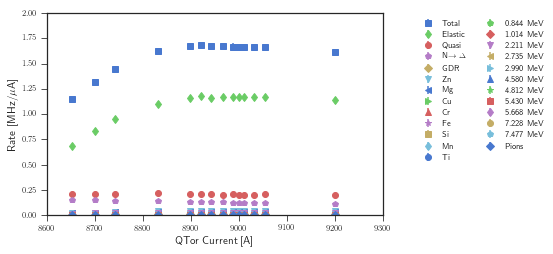

In [14]:
pp.figure(figsize=figsize(1))
pp.errorbar(sim_total.qtor, sim_total.rate, yerr=sim_total.terr, ls='None', marker='s', label='Total')
pp.errorbar(sim_DWelastic.qtor, sim_DWelastic.rate, yerr=sim_DWelastic.terr, ls='None', marker='d', label='Elastic')
pp.errorbar(sim_quasi.qtor, sim_quasi.rate, yerr=sim_quasi.serr, ls='None', marker='o', label='Quasi')
pp.errorbar(sim_inelastic.qtor, sim_inelastic.rate, yerr=sim_inelastic.terr, ls='None', marker='p', label='N$\\rightarrow \Delta$')
pp.errorbar(sim_GDR.qtor, sim_GDR.rate, yerr=sim_GDR.terr, ls='None', marker='D', label='GDR')
pp.errorbar(sim_DWZn.qtor, sim_DWZn.rate, yerr=sim_DWZn.terr, ls='None', marker='v', label='Zn')
pp.errorbar(sim_DWMg.qtor, sim_DWMg.rate, yerr=sim_DWMg.terr, ls='None', marker='<', label='Mg')
pp.errorbar(sim_DWCu.qtor, sim_DWCu.rate, yerr=sim_DWCu.terr, ls='None', marker='>', label='Cu')
pp.errorbar(sim_DWCr.qtor, sim_DWCr.rate, yerr=sim_DWCr.terr, ls='None', marker='^', label='Cr')
pp.errorbar(sim_DWFe.qtor, sim_DWFe.rate, yerr=sim_DWFe.terr, ls='None', marker='*', label='Fe')
pp.errorbar(sim_DWSi.qtor, sim_DWSi.rate, yerr=sim_DWSi.terr, ls='None', marker='s', label='Si')
pp.errorbar(sim_Mn.qtor, sim_Mn.rate, yerr=sim_Mn.terr, ls='None', marker='d', label='Mn')
pp.errorbar(sim_Ti.qtor, sim_Ti.rate, yerr=sim_Ti.terr, ls='None', marker='o', label='Ti')
pp.errorbar(sim_0844keV.qtor, sim_0844keV.rate, yerr=sim_0844keV.terr, ls='None', marker='p', label='0.844 MeV')
pp.errorbar(sim_1014keV.qtor, sim_1014keV.rate, yerr=sim_1014keV.terr, ls='None', marker='D', label='1.014 MeV')
pp.errorbar(sim_2211keV.qtor, sim_2211keV.rate, yerr=sim_2211keV.terr, ls='None', marker='v', label='2.211 MeV')
pp.errorbar(sim_2735keV.qtor, sim_2735keV.rate, yerr=sim_2735keV.terr, ls='None', marker='<', label='2.735 MeV')
pp.errorbar(sim_2990keV.qtor, sim_2990keV.rate, yerr=sim_2990keV.terr, ls='None', marker='>', label='2.990 MeV')
pp.errorbar(sim_4580keV.qtor, sim_4580keV.rate, yerr=sim_4580keV.terr, ls='None', marker='^', label='4.580 MeV')
pp.errorbar(sim_4812keV.qtor, sim_4812keV.rate, yerr=sim_4812keV.terr, ls='None', marker='*', label='4.812 MeV')
pp.errorbar(sim_5430keV.qtor, sim_5430keV.rate, yerr=sim_5430keV.terr, ls='None', marker='s', label='5.430 MeV')
pp.errorbar(sim_5668keV.qtor, sim_5668keV.rate, yerr=sim_5668keV.terr, ls='None', marker='d', label='5.668 MeV')
pp.errorbar(sim_7228keV.qtor, sim_7228keV.rate, yerr=sim_7228keV.terr, ls='None', marker='o', label='7.228 MeV')
pp.errorbar(sim_7477keV.qtor, sim_7477keV.rate, yerr=sim_7477keV.terr, ls='None', marker='p', label='7.477 MeV')
pp.errorbar(sim_pions.qtor, sim_pions.rate, yerr=sim_pions.terr, ls='None', marker='D', label='Pions')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylim(0.0, 2.0)
pp.ylabel('Rate [MHz/$\mu$A]')
#pp.yscale('log')
pp.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0), ncol=2)
pp.tick_params(top=False)
#pp.savefig('plots/al_alloy_4p_DS_qtorscan_sim_processes.png', bbox_inches='tight')
#pp.savefig('plots/al_alloy_4p_DS_qtorscan_sim_processes.pdf', bbox_inches='tight')
#pp.savefig('plots/al_alloy_4p_DS_qtorscan_sim_processes.pgf', bbox_inches='tight')
pp.show()

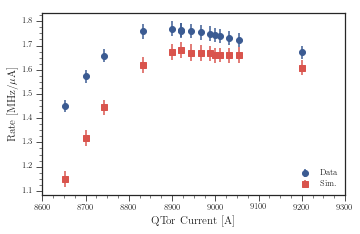

In [17]:
# Absolute Rates
fig, ax = pp.subplots(figsize=figsize(0.9))
ax.errorbar(data.qtor, data.rate, yerr=data.total_err, ls='None', marker='o', color=sns.xkcd_rgb['denim blue'], label='Data')
#pp.plot(scalar_data.qtor, scalar_data.avg, ls='None', marker='o', color=sns.xkcd_rgb['medium green'], label='Old\nScalar')
ax.errorbar(sim_total.qtor, sim_total.rate, yerr=sim_total.terr, ls='None', marker='s',color=sns.xkcd_rgb['pale red'], label='Sim.')
ax.set_xlabel('QTor Current [A]')
ax.set_xlim(8600, 9300)
ax.set_ylabel('Rate [MHz/$\mu$A]')
ax.legend(loc='lower right')
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
pp.savefig('plots/al_alloy_4p_DS_qtorscan_rates.png', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_rates.pdf', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_rates.pgf', bbox_inches='tight')
pp.show()

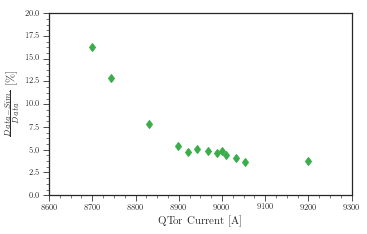

In [19]:
# Absolute Normalized Residuals
fig, ax = pp.subplots(figsize=figsize(0.9))
ax.plot(np.array(sim_total.qtor), pdiff, ls='None', marker='d', color=sns.xkcd_rgb['medium green'])
ax.set_xlabel('QTor Current [A]')
ax.set_xlim(8600, 9300)
ax.set_ylim(0.0, 20.0)
ax.set_ylabel('$\\frac{Data - Sim.}{Data}$ [\%]')
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
pp.savefig('plots/al_alloy_4p_DS_qtorscan_pdiff.png', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_pdiff.pdf', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_pdiff.pgf', bbox_inches='tight')
pp.show()

In [20]:
data_8921_avg_rate = np.average(data[data.qtor == 8921].rate)
print(data_8921_avg_rate)

1.7628499999999998


In [21]:
sfactor = np.ones(len(sim_total.rate))*(data_8921_avg_rate/sim_total.loc[5].rate)
print(sfactor)

[1.04865265 1.04865265 1.04865265 1.04865265 1.04865265 1.04865265
 1.04865265 1.04865265 1.04865265 1.04865265 1.04865265 1.04865265
 1.04865265 1.04865265]


In [14]:
spdiff = 100.0*(np.array(data[data.index != 6].rate) - np.array(sim_total.rate*sfactor))/np.array(data[data.index != 6].rate)

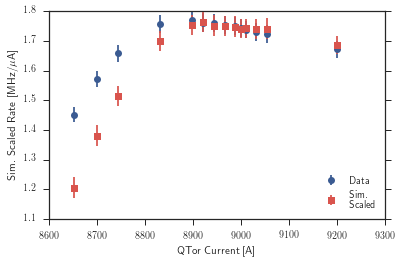

In [18]:
# Simulation Scaled to Data Rates
pp.figure(figsize=figsize(1))
pp.errorbar(data.qtor, data.rate, yerr=data.total_err, ls='None', marker='o', color=sns.xkcd_rgb['denim blue'], label='Data')
pp.errorbar(sim_total.qtor, sim_total.rate*sfactor, yerr=sim_total.terr*sfactor, ls='None', marker='s',color=sns.xkcd_rgb['pale red'], label='Sim.\nScaled')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Sim. Scaled Rate [MHz/$\mu$A]')
pp.legend(loc='lower right')
pp.tick_params(top=False)
pp.savefig('plots/al_alloy_4p_DS_qtorscan_scaled_rates.png', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_scaled_rates.pdf', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_scaled_rates.pgf', bbox_inches='tight')
pp.show()

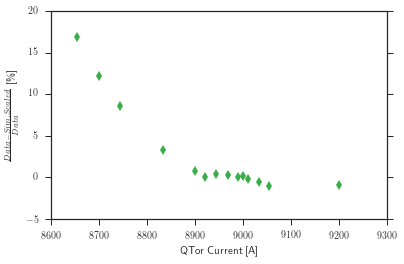

In [19]:
# Scaled Normalized Residuals
pp.figure(figsize=figsize(1))
pp.plot(np.array(sim_total.qtor), spdiff, ls='None', marker='d', color=sns.xkcd_rgb['medium green'])
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('$\\frac{Data - Sim. Scaled}{Data}$ [\%]')
pp.tick_params(top=False)
pp.savefig('plots/al_alloy_4p_DS_qtorscan_scaled_pdiff.png', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_scaled_pdiff.pdf', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_scaled_pdiff.pgf', bbox_inches='tight')
pp.show()

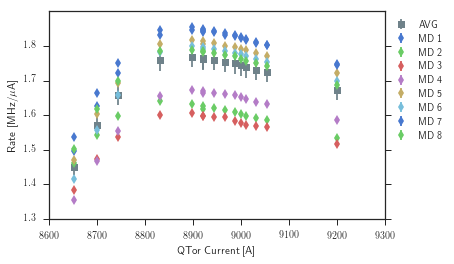

In [20]:
pp.figure(figsize=figsize(1))
pp.errorbar(data.qtor, 
            data.rate, 
            yerr=data.total_err, ls='None', marker='s', label='AVG', color=sns.xkcd_rgb['steel grey'])
pp.errorbar(md_data.qtor, 
            md_data.one, 
            yerr=md_data.one_err, 
            ls='None', 
            marker='d', 
            label='MD 1')
pp.errorbar(md_data.qtor, 
            md_data.two, 
            yerr=md_data.two_err, 
            ls='None', 
            marker='d', 
            label='MD 2')
pp.errorbar(md_data.qtor, 
            md_data.three, 
            yerr=md_data.three_err, 
            ls='None', 
            marker='d', 
            label='MD 3')
pp.errorbar(md_data.qtor, 
            md_data.four, 
            yerr=md_data.four_err, 
            ls='None', 
            marker='d', 
            label='MD 4')
pp.errorbar(md_data.qtor, 
            md_data.five, 
            yerr=md_data.five_err, 
            ls='None', 
            marker='d', 
            label='MD 5')
pp.errorbar(md_data.qtor, 
            md_data.six, 
            yerr=md_data.six_err, 
            ls='None', 
            marker='d', 
            label='MD 6')
pp.errorbar(md_data.qtor, 
            md_data.seven, 
            yerr=md_data.seven_err, 
            ls='None', 
            marker='d', 
            label='MD 7')
pp.errorbar(md_data.qtor, 
            md_data.eight, 
            yerr=md_data.eight_err, 
            ls='None', 
            marker='d', 
            label='MD 8')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Rate [MHz/$\mu$A]')
pp.legend(loc='upper right', bbox_to_anchor=(1.2,1.0))
pp.tick_params(top=False)
pp.show()

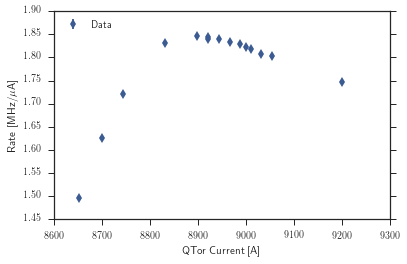

In [51]:
# Main Detector 1
pp.figure(figsize=figsize(1))
pp.errorbar(md_data.qtor, 
            md_data.one, 
            yerr=md_data.one_err, 
            ls='None', 
            marker='d', 
            color=sns.xkcd_rgb['denim blue'], 
            label='Data')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Rate [MHz/$\mu$A]')
pp.legend(loc='upper left')
pp.tick_params(top=False)
pp.show()

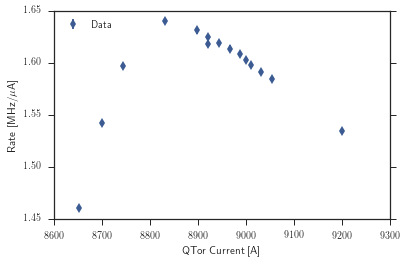

In [52]:
# Main Detector 2
pp.figure(figsize=figsize(1))
pp.errorbar(md_data.qtor, 
            md_data.two, 
            yerr=md_data.two_err, 
            ls='None', 
            marker='d', 
            color=sns.xkcd_rgb['denim blue'], 
            label='Data')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Rate [MHz/$\mu$A]')
pp.legend(loc='upper left')
pp.tick_params(top=False)
pp.show()

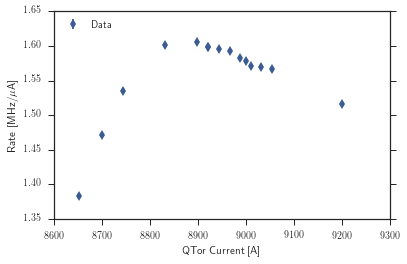

In [54]:
# Main Detector 3
pp.figure(figsize=figsize(1))
pp.errorbar(md_data.qtor, 
            md_data.three, 
            yerr=md_data.three_err, 
            ls='None', 
            marker='d', 
            color=sns.xkcd_rgb['denim blue'], 
            label='Data')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Rate [MHz/$\mu$A]')
pp.legend(loc='upper left')
pp.tick_params(top=False)
pp.show()

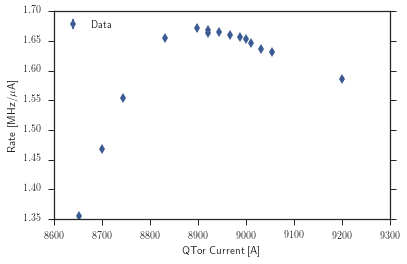

In [55]:
# Main Detector 4
pp.figure(figsize=figsize(1))
pp.errorbar(md_data.qtor, 
            md_data.four, 
            yerr=md_data.four_err, 
            ls='None', 
            marker='d', 
            color=sns.xkcd_rgb['denim blue'], 
            label='Data')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Rate [MHz/$\mu$A]')
pp.legend(loc='upper left')
pp.tick_params(top=False)
pp.show()

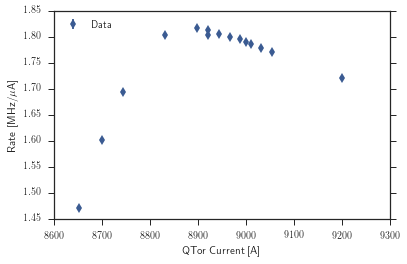

In [56]:
# Main Detector 5
pp.figure(figsize=figsize(1))
pp.errorbar(md_data.qtor, 
            md_data.five, 
            yerr=md_data.five_err, 
            ls='None', 
            marker='d', 
            color=sns.xkcd_rgb['denim blue'], 
            label='Data')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Rate [MHz/$\mu$A]')
pp.legend(loc='upper left')
pp.tick_params(top=False)
pp.show()

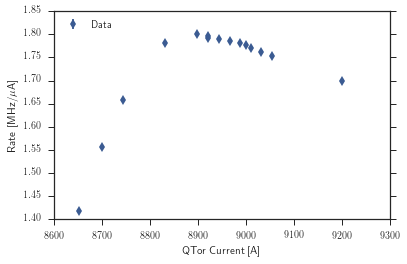

In [57]:
# Main Detector 6
pp.figure(figsize=figsize(1))
pp.errorbar(md_data.qtor, 
            md_data.six, 
            yerr=md_data.six_err, 
            ls='None', 
            marker='d', 
            color=sns.xkcd_rgb['denim blue'], 
            label='Data')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Rate [MHz/$\mu$A]')
pp.legend(loc='upper left')
pp.tick_params(top=False)
pp.show()

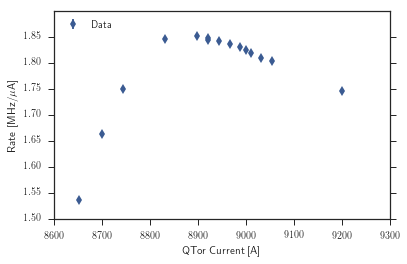

In [58]:
# Main Detector 7
pp.figure(figsize=figsize(1))
pp.errorbar(md_data.qtor, 
            md_data.seven, 
            yerr=md_data.seven_err, 
            ls='None', 
            marker='d', 
            color=sns.xkcd_rgb['denim blue'], 
            label='Data')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Rate [MHz/$\mu$A]')
pp.legend(loc='upper left')
pp.tick_params(top=False)
pp.show()

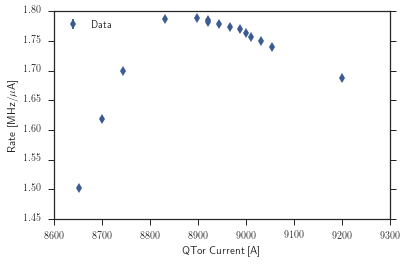

In [59]:
# Main Detector 8
pp.figure(figsize=figsize(1))
pp.errorbar(md_data.qtor, 
            md_data.eight, 
            yerr=md_data.eight_err, 
            ls='None', 
            marker='d', 
            color=sns.xkcd_rgb['denim blue'], 
            label='Data')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Rate [MHz/$\mu$A]')
pp.legend(loc='upper left')
pp.tick_params(top=False)
pp.show()

In [15]:
from scipy.special import spence

In [16]:
sim_DWelastic_q2 = pd.read_csv('data/Al_Alloy_4p_DS_DWelastic_run1_sim_q2_avg.csv',  usecols=cols, header=None, names=['q2'] + header[1:])
sim_DWelastic_q2['qtor'] = qtor
sim_DWelastic_th = pd.read_csv('data/Al_Alloy_4p_DS_DWelastic_run1_sim_theta_avg.csv',  usecols=cols, header=None, names=['theta'] + header[1:])
sim_DWelastic_th['qtor'] = qtor

In [17]:
np.deg2rad(sim_DWelastic_th.theta)

0     0.136761
1     0.135591
2     0.134633
3     0.132980
4     0.132394
5     0.132228
6     0.132341
7     0.132254
8     0.132172
9     0.132231
10    0.132270
11    0.132189
12    0.132261
13    0.132392
Name: theta, dtype: float64

In [18]:
def schwinger(e, q2, th):
    alpha = 1/137.035999139 # 2016 PDG
    m_e = 0.5109989461 # [MeV] 2016 PDG
    deltaE = 20.0 # [MeV]
    t1 = (np.log(e/deltaE) - (13.0/12.0))*(np.log(q2/np.square(m_e))-1.0)
    t2 = (17.0/36.0)
    t3 = 0.5*((1/6.0)*np.square(np.pi)-spence(1-np.square(np.cos(th/2))))
    return (2.0*alpha/np.pi)*(t1+t2+t3)

In [19]:
DWelastic_schwinger = schwinger(1161.09, sim_DWelastic_q2.q2*np.square(1000.0), np.deg2rad(sim_DWelastic_th.theta))

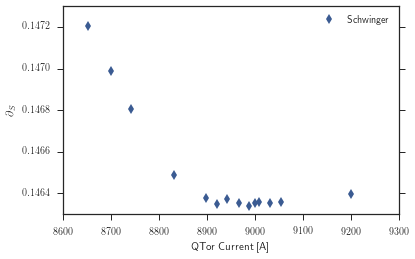

In [20]:
pp.figure(figsize=figsize(1))
pp.plot(qtor, 
        DWelastic_schwinger, 
        ls='None', 
        marker='d', 
        color=sns.xkcd_rgb['denim blue'], 
        label='Schwinger')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('$\partial_{S}$')
pp.legend(loc='upper right')
pp.tick_params(top=False)
pp.savefig('plots/al_alloy_4p_DS_qtorscan_elastic_Schwinger.png', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_elastic_Schwinger.pdf', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_elastic_Schwinger.pgf', bbox_inches='tight')
pp.show()

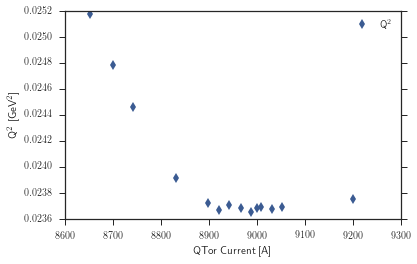

In [63]:
pp.figure(figsize=figsize(1))
pp.plot(sim_DWelastic_q2.qtor, 
        sim_DWelastic_q2.q2,
        ls='None', 
        marker='d', 
        color=sns.xkcd_rgb['denim blue'], 
        label='Q$^{2}$')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('Q$^{2}$ [GeV$^{2}$]')
pp.legend(loc='upper right')
pp.tick_params(top=False)
pp.savefig('plots/al_alloy_4p_DS_qtorscan_elastic_q2.png', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_elastic_q2.pdf', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_elastic_q2.pgf', bbox_inches='tight')
pp.show()

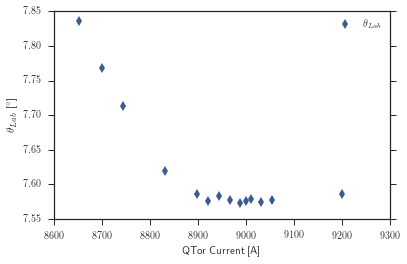

In [64]:
pp.figure(figsize=figsize(1))
pp.plot(sim_DWelastic_th.qtor, 
        sim_DWelastic_th.theta,
        ls='None', 
        marker='d', 
        color=sns.xkcd_rgb['denim blue'], 
        label='$\\theta_{Lab}$')
pp.xlabel('QTor Current [A]')
pp.xlim(8600, 9300)
pp.ylabel('$\\theta_{Lab}$ [$^{\circ}$]')
pp.legend(loc='upper right')
pp.tick_params(top=False)
pp.savefig('plots/al_alloy_4p_DS_qtorscan_elastic_th.png', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_elastic_th.pdf', bbox_inches='tight')
pp.savefig('plots/al_alloy_4p_DS_qtorscan_elastic_th.pgf', bbox_inches='tight')
pp.show()